# Introduction to Inferential Statistics (推論統計)

## Introduction to Probability

* Basic Probability
* Conditional Probability
* Simple Probability Distribution 概率分佈
* Probability Mass Function (概率質量函數 p.m.f) & Probability Density Function (概率密度函數 p.d.f)
* Normal Distribution 正態分佈
* Normal Distribution & Standard Deviation 正態分佈和標準偏差

## Introduction to Inference

* Sample Mean & Population Mean 均值
* Statistical Inference 統計推斷
* Central Limit Theorem 中心極限定理
* Confidence Intervals 信賴區間
* Interpretation Of Confidence Interval




In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('input/sta-train.csv')
pd.set_option('max_columns', 82)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Basic Probability Rules

* P that an event occurs with certainty is 1 事件確定發生的概率為 1
* P that an event will not occur surely is 0 事件肯定不會發生的概率為 0
* P of the complement of an event is 1 minus the probability of that event. 事件的補碼概率是 1 減去該事件的概率。
* P of at least 1 or more things that can not simultaneously occur is the sum of their respective probabilities

* **Mutually exclusive is a statistical term describing two or more events that cannot occur simultaneously. For example, it is impossible to roll a five and a three on a single die at the same time.互斥是描述兩個或多個不能同時發生的事件的統計術語。 例如，不可能在一個骰子上同時擲出 5 和 3。**

>For any 2 events A & B, the probability that at least one occurs is the sum of their individual probabilities minus the probability of their intersection.

對於任意 2 個事件 A 和 B，至少一個事件發生的概率是它們各自概率的總和減去它們相交的概率。 IE


$$ P(A\cup B) = P(A) + P(B) - P(A\cap B) $$

In [3]:
# total number of houses in the neighborhood
all_houses = data.shape[0]
print("Total Number of Houses in the Neighborhood :", all_houses)

# total number of houses in the Old town neighborhood
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]
print("Total Number of Houses in the Old Town Road :", houses_in_OldTown)

# lets find the probability of picking a House in the Old Town
probability = (houses_in_OldTown/all_houses)*100
print('Probability of picking a house in OldTown: {0:.2f}'.format(probability )+'%')

Total Number of Houses in the Neighborhood : 1460
Total Number of Houses in the Old Town Road : 113
Probability of picking a house in OldTown: 7.74%


## Conditional Probability 條件概率

* There are 10 candies in a bag: 5 green, and 5 blue. 一個袋子裡有 10 顆糖果：5 顆綠色，5 顆藍色。
* What is the probability of getting 3 blue candies in a row? 連續獲得 3 個藍色糖果的概率是多少？
* The probability of getting the first blue candy is 5/10, or 1/2. 第一個糖果為藍色的概率是 5/10，或 1/2。

當我們挑選到藍色糖果時，我們會將其從袋子中取出。我們總共剩下 9 個糖果，其中 (5-1)=4 個藍色糖果。所以得到另一個藍色的概率是 4/9。同理，撿到第三顆藍色糖果的概率是 3/8，因為我們正在計算選擇 1 Blue Candy AND 1 Blue Candy AND 1 Blue Candy 的概率。我們的最終概率是 1/2 * 4/9 * 3/8，即 0.0833。因此，有 8.3% 的機會連續挑選三個藍色糖果。

### 簡單的技巧：
- 當你必須口頭說 AND 時會想要乘以概率。
- 每當你必須口頭說 OR 時，你就會想要增加概率。

In [4]:
## 鑑於我們有可能在“OldTown”社區挑選房子，我們更進一步，再次從“OldTown”社區挑選房子的機率？
cond_prob = (houses_in_OldTown/all_houses)
((houses_in_OldTown - 1)/(all_houses - 1)) 
print("P of Picking a House in Old Town (and) again picking a house from the same neighborhood is {0:.9f}".format(cond_prob*100))

P of Picking a House in Old Town (and) again picking a house from the same neighborhood is 7.739726027


## Normal Distrution 正態分佈 (高斯分佈)

* Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.



一種關於均值對稱的概率分佈，表明接近均值的數據比遠離均值的數據出現的頻率更高。 正態分佈將顯示為鍾形曲線。我們通常檢查數據目標列中的歪斜度。
偏度是一種分佈狀態，其中分佈高度偏向圖的右側或左側。我們的目標變量(SalePrice) 分佈與正態分佈不同，它向右傾斜，如果我們移除異常值，它會有點類似於正態分佈

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


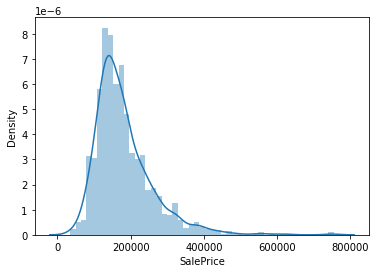

In [5]:
sns.distplot(data['SalePrice'])
plt.show()

### Sample Mean and population Mean 樣本均值和總體均值

* 讓我們考慮從 1460 間房屋中隨機抽取 500 間房屋的樣本並繪製它的平均值
* 但是這 500 所房屋的平均值可能與之前計算的 1460 所房屋的平均值相近或相距甚遠。

In [6]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=500)  #lets take 500 sample
print ("Sample mean:", sample_ages.mean() )          
print("Population mean:", data['SalePrice'].mean())

Sample mean: 177499.802
Population mean: 180921.19589041095


## Central Limit Theorem 中央極限定理

>The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. Furthermore, all of the samples will follow an approximate normal distribution pattern, with all variances being approximately equal to the variance of the population divided by each sample's size.

中央極限定理 (CLT) 是一種統計理論，在具有有限方差水平的總體中，給定足夠大的樣本量，來自同一總體的所有樣本的平均值將大約等於總體的平均值。 此外，所有樣本都將遵循近似的正態分佈模式，所有方差大約等於總體方差除以每個樣本的大小。

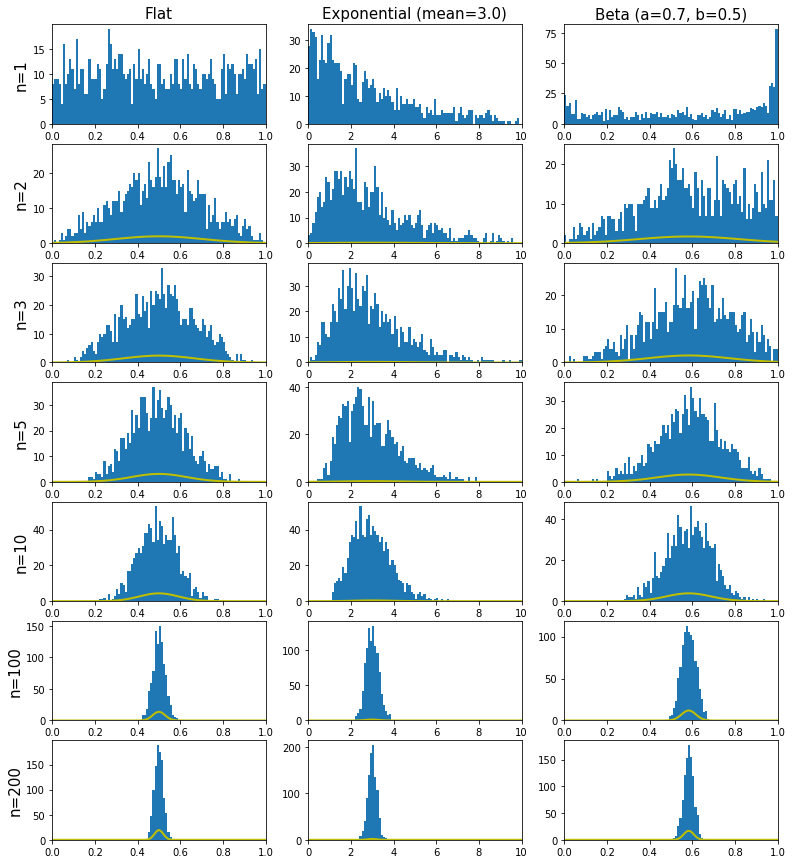

In [7]:
from functools import partial  # 使用定義函數的能力

n=np.array([1, 2, 3, 5, 10, 100, 200]) # 平均樣本數。
N = 1000     # 採樣大小為 n 的次數。
nobb=101     # 圖上的 bin 邊界數
exp_mean=3   # 指數分佈的平均值
a,b=0.7,0.5  # parameters of beta distribution

dist=[partial(np.random.random), 
      partial(np.random.exponential, exp_mean),
      partial(np.random.beta, a, b)]

title_names=["Flat",
             "Exponential (mean=%.1f)" % exp_mean, 
             "Beta (a=%.1f, b=%.1f)" % (a,b)]

drange=np.array([[0,1],[0,10],[0,1]])    # 三種分佈的範圍
means=np.array([0.5,exp_mean,a/(a+b)])   # 三種分佈的均值
var=np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)])   # 三種分佈的方差

# 為各個分佈生成指定範圍內的隨機樣本。
binrange=np.array([np.linspace(p,q,nobb) for p,q in drange]) 
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

# 循環n個樣本的數量來平均
for i in range(ln):
    for j in range(ld):
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j])
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'y',linewidth=2)     
plt.show()

## Confidence Interval 信賴區間

置信區間 (CI) 是一種根據觀察數據的統計計算得出的估計值。 這為未知參數（例如，平均值）提出了一系列合理的值。 該區間有一個相關的置信水平，即真實參數在建議的範圍內。95% 置信區間定義了一個可以 95% 確定包含總體均值的值範圍。 對於大樣本，您知道平均值比小樣本更精確，因此從大樣本計算時置信區間非常窄。

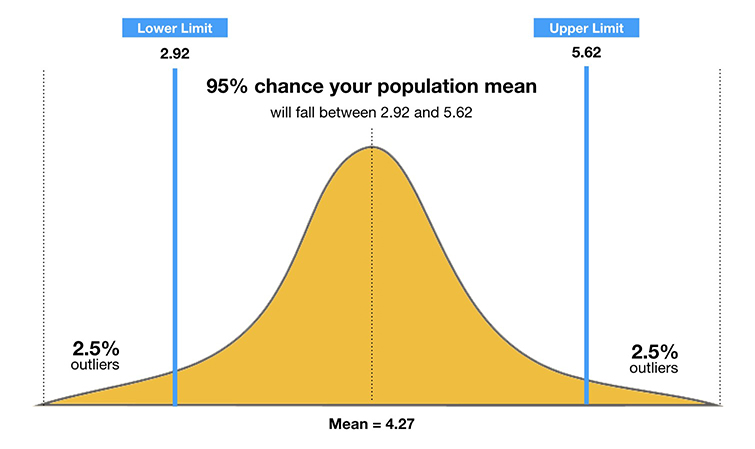


In [8]:
import scipy.stats as stats
import math

np.random.seed(10)
sample_size = 1000
sample = np.random.choice(a= data['SalePrice'],size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value 獲取 z 臨界值 0.95
z_critical = stats.norm.ppf(q = 0.95)  
print("z-critical value: ",z_critical)                                

pop_stdev = data['SalePrice'].std()    #SD
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))  # 誤差範圍

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['SalePrice'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (178338.05201966673, 186602.42998033328)
True mean: 180921.19589041095


- 95% 的置信區間意味著如果我們抽取許多樣本並為每個樣本創建置信區間，則 95% 的樣本置信區間將包含真實的總體均值。
- 現在讓我們創建幾個置信區間並繪製它們以更好地了解“捕獲”真實均值的含義
- 很容易看出 95% 的藍線（樣本均值）與紅線（真實均值）重疊，還有 5% 的預期不與紅線重疊（真實均值）

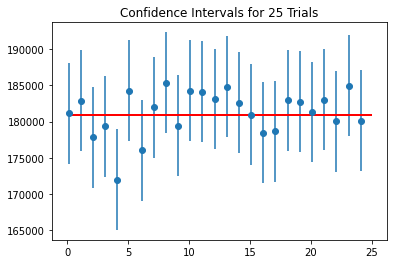

In [9]:
np.random.seed(12)
sample_size = 500
intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    
    z_critical = stats.norm.ppf(q = 0.975)         
    pop_stdev = data['SalePrice'].std()  

    stats.norm.ppf(q = 0.025)
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    intervals.append(confidence_interval)
    
plt.errorbar(x=np.arange(0.1, 25, 1), y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],fmt='o')

plt.hlines(xmin=0, xmax=25,y=data['SalePrice'].mean(), 
           linewidth=2.0,color="red")

plt.title('Confidence Intervals for 25 Trials')
plt.show()